In [1]:
# Kill any existing process using port 8888 (or change port if needed)
!kill $(lsof -t -i:8888)

/bin/bash: lsof: command not found
kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]


In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import statistics
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.model_selection._split')

In [4]:
import sys 
sys.path.append('/kaggle/input/averiaj/Dataset---Disease-Prediction-Using--Machine-Learning.csv')

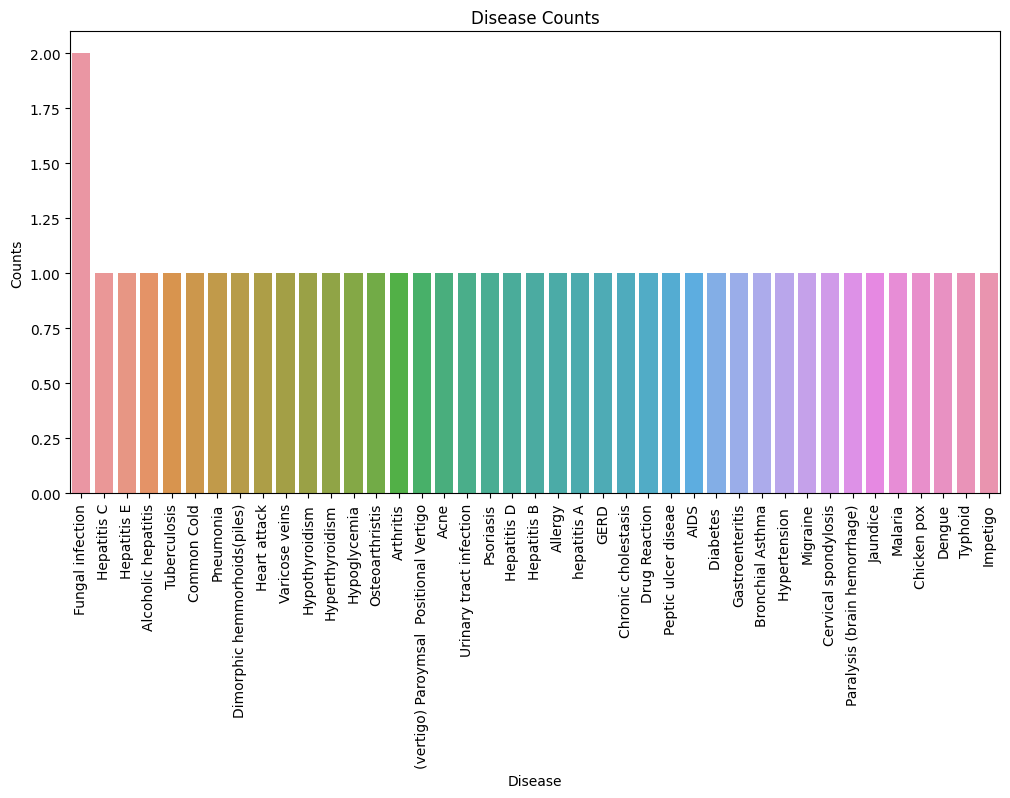

In [5]:
# Reading the train.csv by removing the
# last column since it's an empty column
DATA_PATH = "/kaggle/input/averiaj/Dataset---Disease-Prediction-Using--Machine-Learning.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (12,6))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.title("Disease Counts")
plt.show()

In [6]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [7]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.3, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (29, 132), (29,)
Test: (13, 132), (13,)


In [8]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
# Setting up StratifiedKFold cross-validation with a smaller number of splits
skf = StratifiedKFold(n_splits=2)
# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=skf, n_jobs=-1, scoring=cv_scoring)
    print("==" * 30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [0.         0.04761905]
Mean Score: 0.023809523809523808
Gaussian NB
Scores: [0.         0.04761905]
Mean Score: 0.023809523809523808
Random Forest
Scores: [0.         0.04761905]
Mean Score: 0.023809523809523808


Accuracy on train data by SVM Classifier: 89.65517241379311
Accuracy on test data by SVM Classifier: 0.0


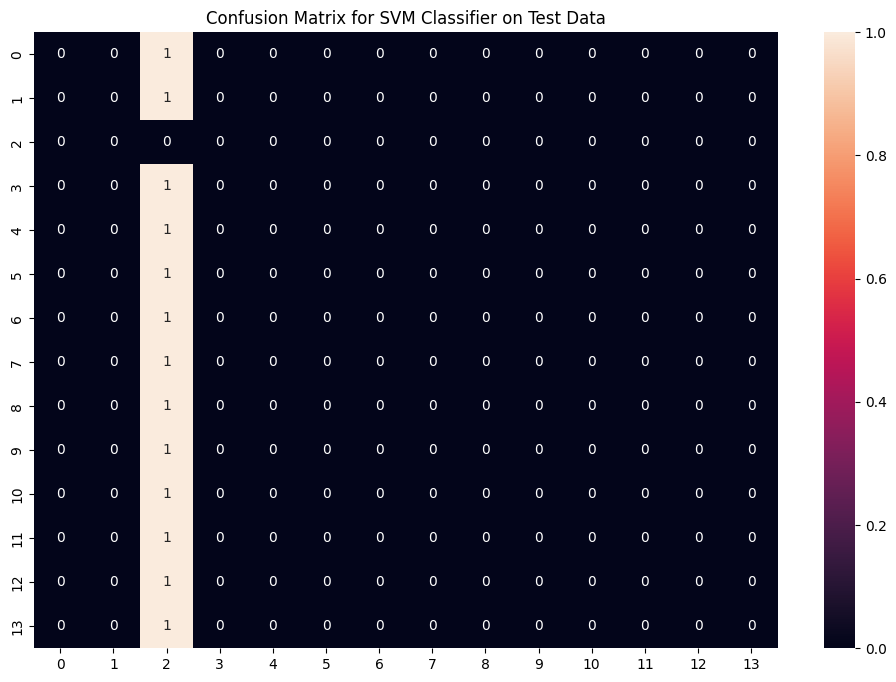

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 0.0


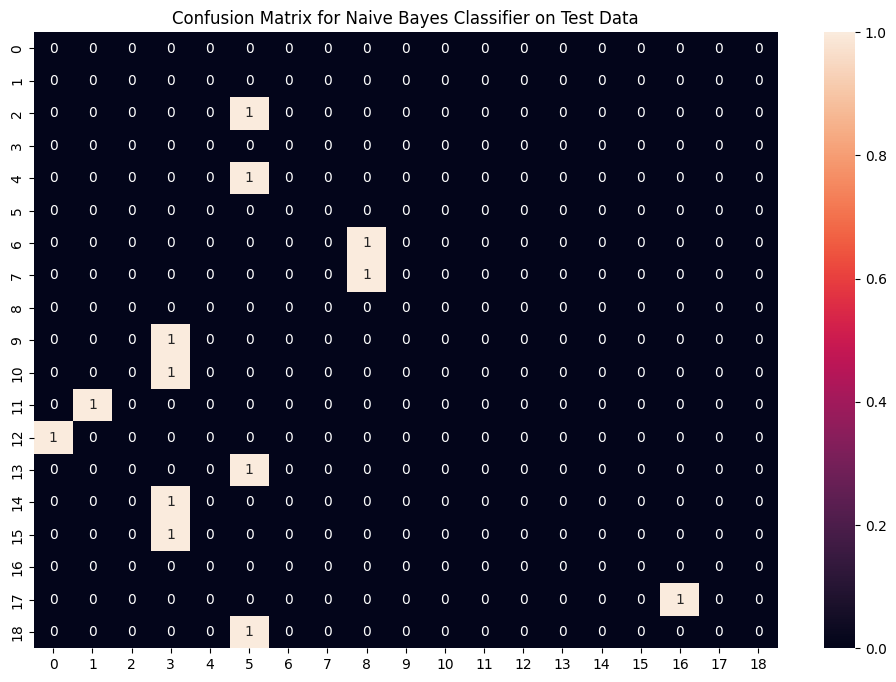

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 0.0


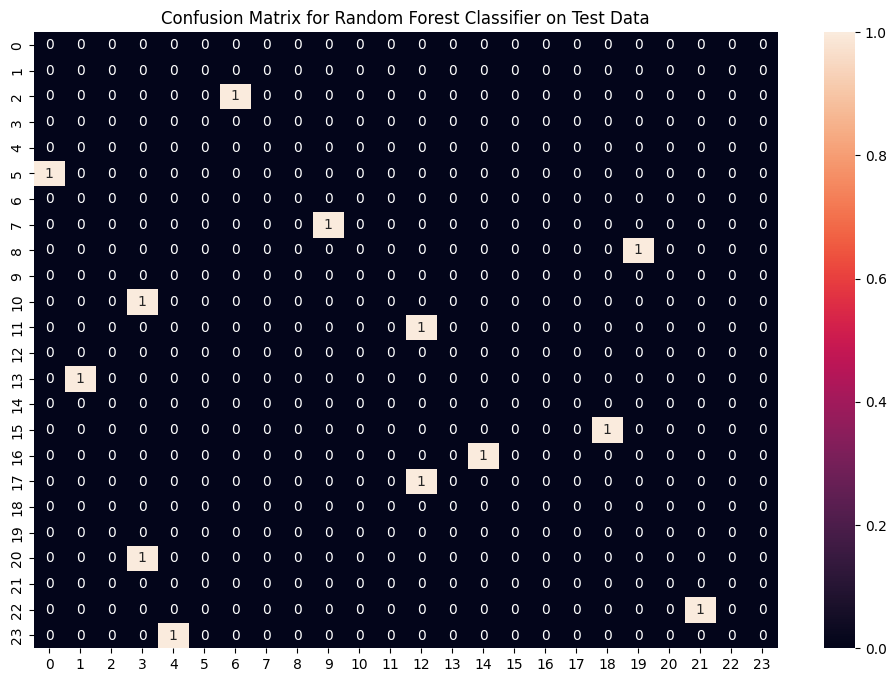

In [9]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier: {accuracy_score(y_train, svm_model.predict(X_train)) * 100}")
print(f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test, preds) * 100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)

# Evaluate performance for Naive Bayes
print(f"Accuracy on train data by Naive Bayes Classifier: {accuracy_score(y_train, nb_model.predict(X_train)) * 100}")  # Use nb_model instead of rf_model
print(f"Accuracy on test data by Naive Bayes Classifier: {accuracy_score(y_test, preds) * 100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

# Evaluate performance for Random Forest
print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, rf_model.predict(X_train)) * 100}")
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, preds) * 100}")

# Confusion matrix for Random Forest
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

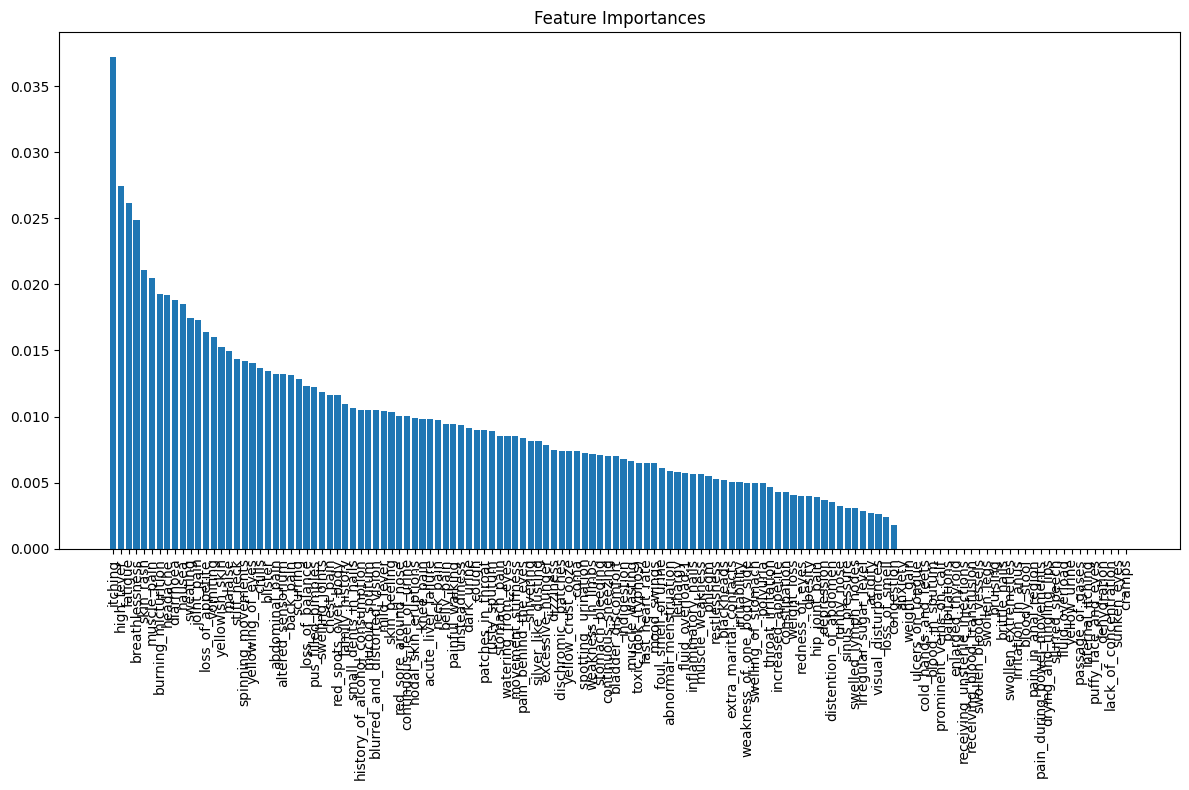

In [10]:
# Displaying feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


Accuracy on Test dataset by the SVM model: 92.86%


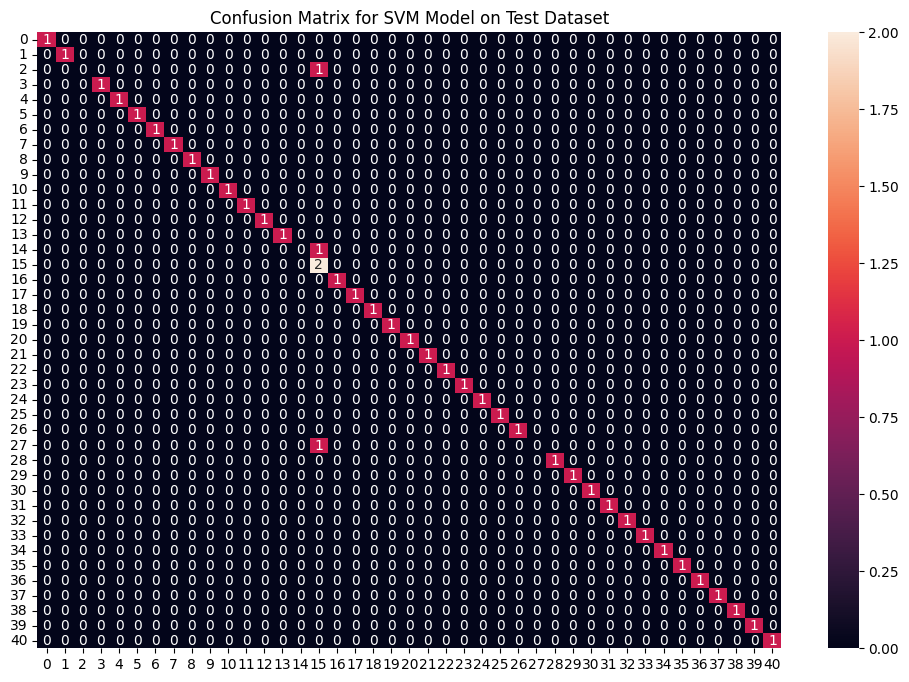

Accuracy on Test dataset by the Naive Bayes model: 100.00%


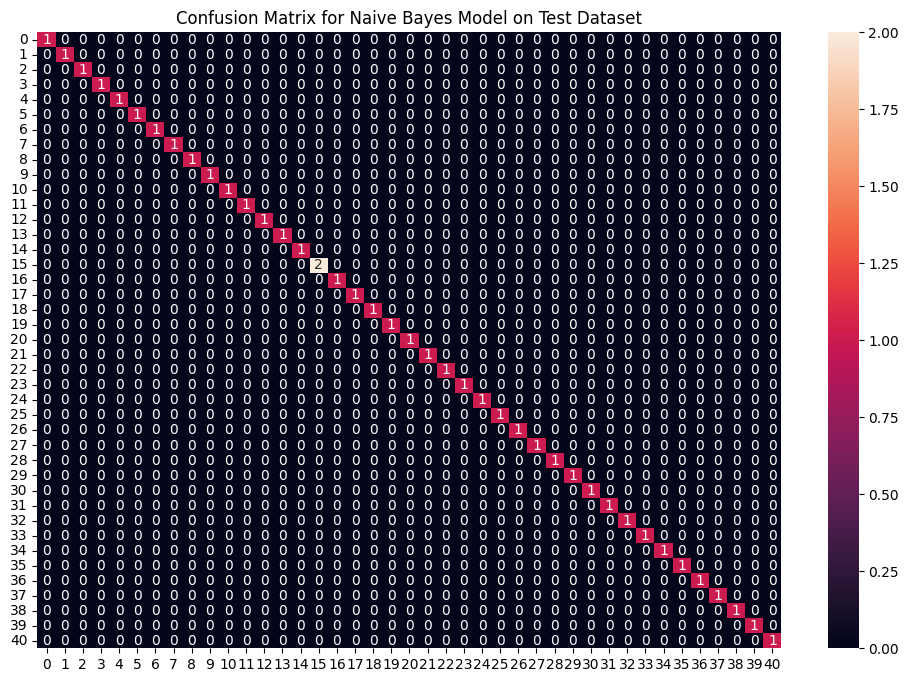

Accuracy on Test dataset by the Random Forest model: 100.00%


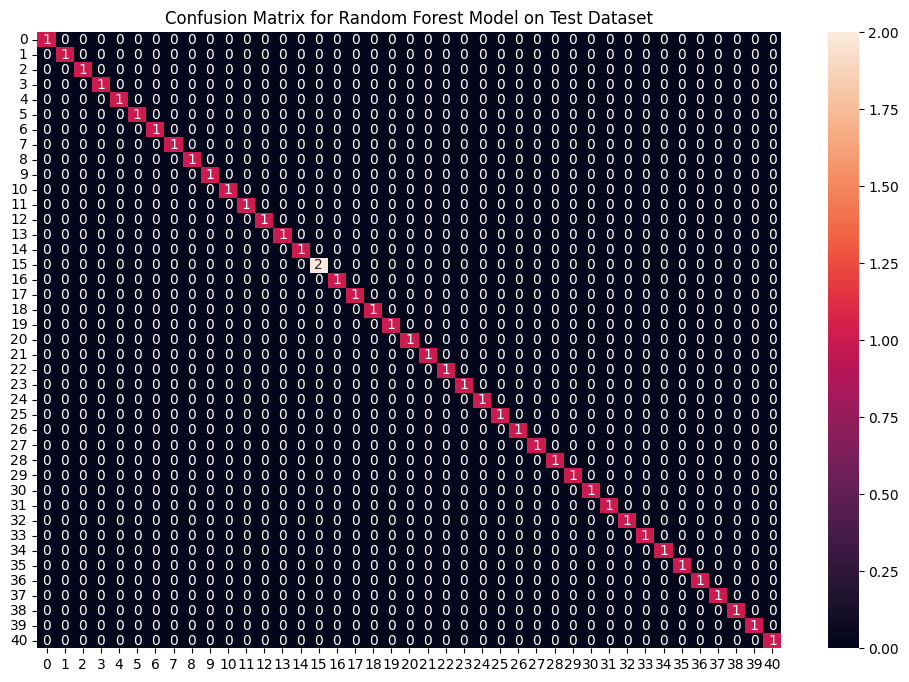

In [11]:
# Training the models on whole data 
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Reading the test data
test_data = pd.read_csv("/kaggle/input/averiaj/Dataset---Disease-Prediction-Using--Machine-Learning.csv").dropna(axis=1)
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making predictions with each classifier
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

# Accuracy and confusion matrix for SVM model
print(f"Accuracy on Test dataset by the SVM model: {accuracy_score(test_Y, svm_preds)*100:.2f}%")
cf_matrix_svm = confusion_matrix(test_Y, svm_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix_svm, annot=True)
plt.title("Confusion Matrix for SVM Model on Test Dataset")
plt.show()

# Accuracy and confusion matrix for Naive Bayes model
print(f"Accuracy on Test dataset by the Naive Bayes model: {accuracy_score(test_Y, nb_preds)*100:.2f}%")
cf_matrix_nb = confusion_matrix(test_Y, nb_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix_nb, annot=True)
plt.title("Confusion Matrix for Naive Bayes Model on Test Dataset")
plt.show()

# Accuracy and confusion matrix for Random Forest model
print(f"Accuracy on Test dataset by the Random Forest model: {accuracy_score(test_Y, rf_preds)*100:.2f}%")
cf_matrix_rf = confusion_matrix(test_Y, rf_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix_rf, annot=True)
plt.title("Confusion Matrix for Random Forest Model on Test Dataset")
plt.show()

In [13]:
# Creating a symptom index dictionary to encode the input symptoms into numerical form
symptoms = X.columns.values
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

# Defining the function to predict disease
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        symptom = symptom.strip()  # remove extra spaces if any
        if symptom in data_dict["symptom_index"]:
            index = data_dict["symptom_index"][symptom]
            input_data[index] = 1
        else:
            print(f"Symptom '{symptom}' not recognized!")
            return

    # reshaping the input data and converting it into suitable format for model predictions
    input_data = np.array(input_data).reshape(1, -1)

    # converting input data to pandas DataFrame to include feature names
    input_df = pd.DataFrame(input_data, columns=X.columns)

    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_df)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_df)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_df)[0]]

    # making final prediction by taking mode of all predictions
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])

    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }
    
    return predictions

# Function to visualize predictions
def plot_predictions(predictions):
    # Count occurrences of each prediction
    model_names = ['Random Forest', 'Naive Bayes', 'SVM', 'Final Prediction']
    pred_values = [predictions['rf_model_prediction'], 
                   predictions['naive_bayes_prediction'], 
                   predictions['svm_model_prediction'], 
                   predictions['final_prediction']]

# Testing the function with the provided symptoms
result = predictDisease("Itching, Skin Rash, Nodal Skin Eruptions")
print(result)



{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}
